###Importing required Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.linear_model import Ridge,LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')


###Importing the Dataset

In [ ]:
df=pd.read_csv("https://www.dropbox.com/s/aa37fjiyy63l2h7/UsedCarPrice.csv?dl=1")

In [ ]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


###Visualizing the data

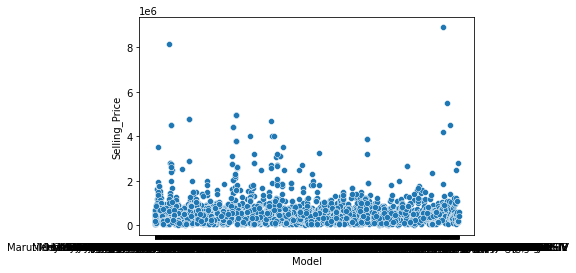

In [ ]:
plt.figure()
sns.scatterplot(x=df['Model'],y=df['Selling_Price'])

In [ ]:
df.isnull().mean()

Brand            0.0
Model            0.0
Year             0.0
Selling_Price    0.0
KM_Driven        0.0
Fuel             0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [ ]:
df.duplicated()[df.duplicated().values==True]

13      True
14      True
15      True
16      True
17      True
        ... 
4307    True
4308    True
4309    True
4310    True
4311    True
Length: 763, dtype: bool

In [ ]:
object_features=[col for col in df.columns if df[col].dtype=='O']
numerical_features=list(set(df.columns)-set(object_features))

print("Len(object_features):",len(object_features))
print("Len(numerical_features):",len(numerical_features))

Len(object_features): 6
Len(numerical_features): 3


In [ ]:
df.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


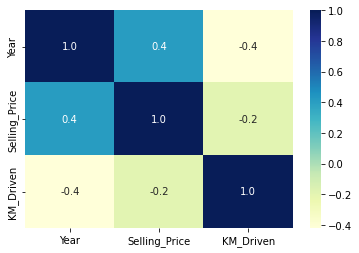

In [ ]:
plt.figure()
sns.heatmap(df.corr(),annot=True,fmt='0.1f',cmap="YlGnBu")

In [ ]:
for col in object_features:
    print(col+' unique values:',len(df[col].unique()))

Brand unique values: 29
Model unique values: 1491
Fuel unique values: 5
Seller_Type unique values: 3
Transmission unique values: 2
Owner unique values: 5


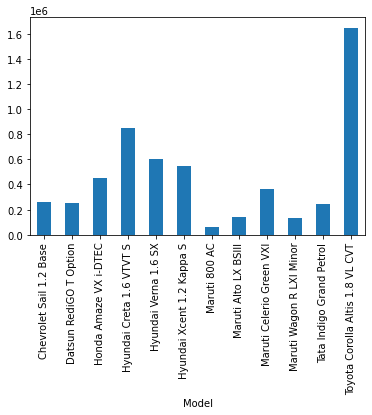

In [ ]:
g=df['Selling_Price'].groupby(df['Model'][:20]).mean().plot.bar()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

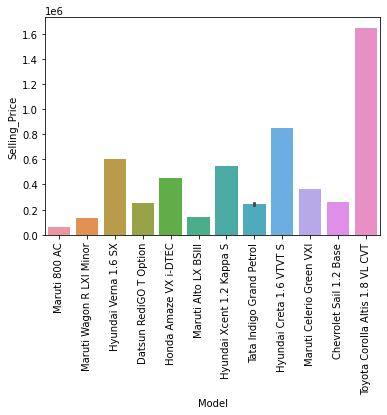

In [ ]:
sns.barplot(x=df['Model'][:20],y=df['Selling_Price'])
plt.xticks(rotation=90)

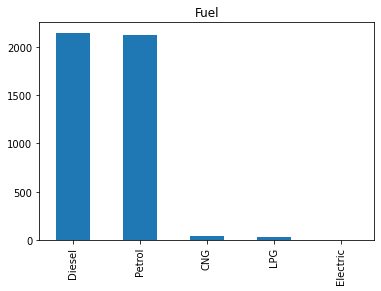

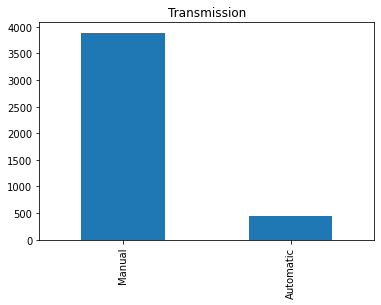

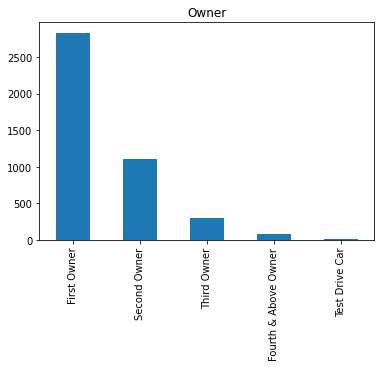

In [ ]:
for col in ['Fuel','Transmission','Owner']:
    df[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

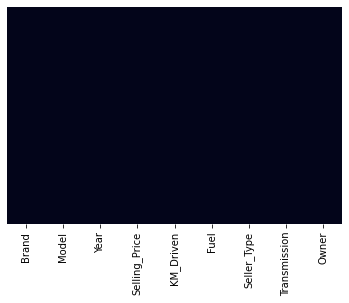

In [ ]:
plt.figure()
sns.heatmap(df.isnull(),cbar=False,yticklabels=False)

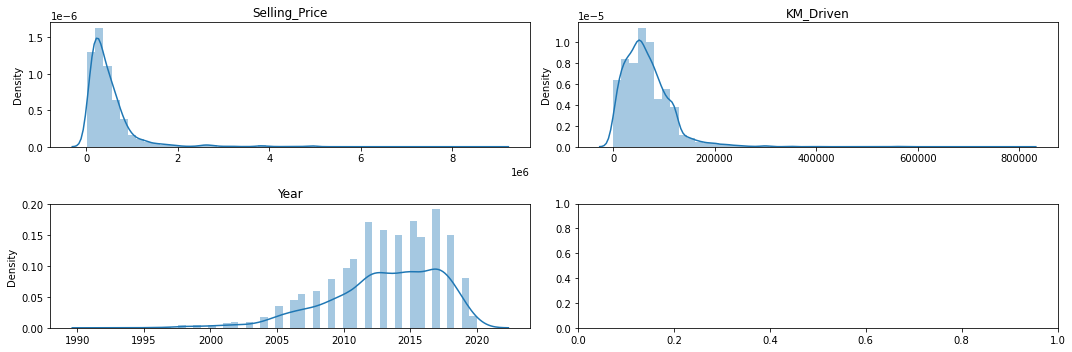

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(15,5))
for i,(col,ax) in enumerate(zip(numerical_features,axes.ravel())):
    sns.distplot(x=df[col],bins=50,ax=ax)
    ax.set_title(numerical_features[i])

fig.tight_layout()  

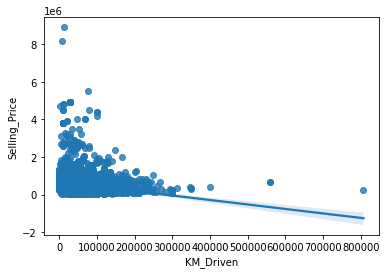

In [ ]:
sns.regplot(x=df['KM_Driven'],y=df['Selling_Price'])

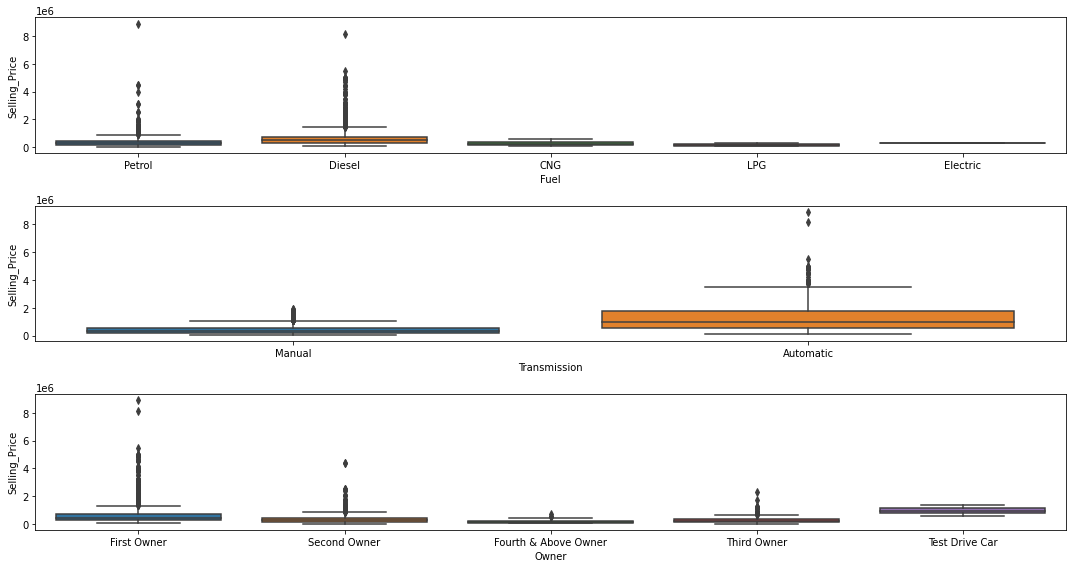

In [ ]:
fig,axes=plt.subplots(3,1,figsize=(15,8))
for col,ax in zip(['Fuel','Transmission','Owner'],axes.ravel()):
    sns.boxplot(df[col],df['Selling_Price'],ax=ax)
    
fig.tight_layout()

###Doing Label Encoding and fit transform

In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

for col in object_features:
    df[col]=label.fit_transform(df[col])

In [ ]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,18,775,2007,60000,70000,4,1,1,0
1,18,1041,2007,135000,50000,4,1,1,0
2,10,505,2012,600000,100000,1,1,1,0
3,5,118,2017,250000,46000,4,1,1,0
4,9,279,2014,450000,141000,1,1,1,2


###Splitting the data

In [ ]:
y=df.Selling_Price
X=df.drop('Selling_Price',axis=1)

###Doing train test split and printing the shape of X_train,X_test,y_train and y_test

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               random_state=21,
                                               test_size=0.2)

print("X_train shape:{}".format(X_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("X_test shape:{}".format(X_test.shape))
print("y_test shape:{}".format(y_test.shape))

X_train shape:(3472, 8)
y_train shape:(3472,)
X_test shape:(868, 8)
y_test shape:(868,)


##Modeling

###1)Random Forest Regressor

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
select=RFE(RandomForestRegressor(n_estimators=100,random_state=42),n_features_to_select=7)
select.fit(X_train,y_train)

RFE(estimator=RandomForestRegressor(random_state=42), n_features_to_select=7)

In [ ]:
X_train_select=select.transform(X_train)
print("X_train_select shape:{}".format(X_train_select.shape))

X_train_select shape:(3472, 7)


Index(['Brand', 'Model', 'Year', 'KM_Driven', 'Fuel', 'Seller_Type',
       'Transmission'],
      dtype='object')


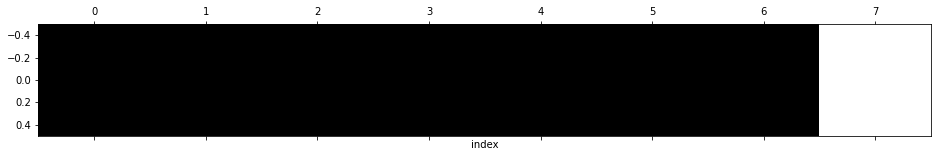

In [ ]:
mask=select.get_support()
plt.matshow(mask.reshape(1, -1),cmap='gray_r')
plt.xlabel('index')
print(X_train.columns[mask])

In [ ]:
X_test_select=select.transform(X_test)
print("X_test_select shape:{}".format(X_test_select.shape))

X_test_select shape:(868, 7)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X_train_sc=sc.fit_transform(X_train_select)
X_test_sc=sc.transform(X_test_select)

In [ ]:
def mae(y_model,y_true):
    """
    The mean_absolute_error
    """
    return mean_absolute_error(y_model,y_true)

In [ ]:
def rmse(y_model,y_true):
    """
    The root_mean_square_error
    """
    return np.sqrt(mean_squared_error(y_model,y_true))

###2)Linear Regression and Regularize polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
X_train_poly=poly.fit_transform(X_train_sc)
X_test_poly=poly.transform(X_test_sc)

linear_models=[LinearRegression(),Ridge()]
for i,m in enumerate(linear_models):
    if i ==0:
        
        m.fit(X_train_sc,y_train)
        y_pred=m.predict(X_test_sc)
    
        print("model : {}".format(m))
        print("training set score:{:0.2f}".format(m.score(X_train_sc,y_train)))
        print("mae:{:0.2f}".format(mae(y_pred,y_test)))
        print("rmse:{:0.2f}".format(rmse(y_pred,y_test)))
        print("test set score:{:0.2f}".format(m.score(X_test_sc,y_test)))
        print("_ "*30,'\n')
    else :
        m.fit(X_train_poly,y_train)
        y_pred=m.predict(X_test_poly)
        print("model : {}".format('Regularize polynomial Regression'))
        print("training set score:{:0.2f}".format(m.score(X_train_poly,y_train)))
        print("mae:{:0.2f}".format(mae(y_pred,y_test)))
        print("rmse:{:0.2f}".format(rmse(y_pred,y_test)))
        print("r2 value:{:0.2f}".format(m.score(X_test_poly,y_test)))
        print("_ "*30,'\n')

model : LinearRegression()
training set score:0.44
mae:243520.52
rmse:437148.59
test set score:0.49
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  

model : Regularize polynomial Regression
training set score:0.65
mae:175148.11
rmse:323087.33
r2 value:0.72
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  



####3)Displaying training test score, mae, rmse and r2 value of  non linear models(SVR ,GradientBoostingRegressor, KNeighborsRegressor, XGBRegressor)

In [ ]:
non_linearmodels=[SVR(),GradientBoostingRegressor(learning_rate=0.1,max_depth=4,n_estimators=600),KNeighborsRegressor(),XGBRegressor()]
for m in non_linearmodels:
    
    m.fit(X_train_sc,y_train)
    y_pred=m.predict(X_test_sc)
    
    print("model : {}".format(m))
    print("training set score:{:0.2f}".format(m.score(X_train_sc,y_train)))
    print("mae:{:0.2f}".format(mae(y_pred,y_test)))
    print("rmse:{:0.2f}".format(rmse(y_pred,y_test)))
    print("r2 value:{:0.2f}".format(m.score(X_test_sc,y_test)))
    print("_ "*30,'\n')

model : SVR()
training set score:-0.07
mae:322034.33
rmse:640918.91
r2 value:-0.09
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  

model : GradientBoostingRegressor(max_depth=4, n_estimators=600)
training set score:0.99
mae:86535.78
rmse:250436.12
r2 value:0.83
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  

model : KNeighborsRegressor()
training set score:0.81
mae:136403.11
rmse:300199.16
r2 value:0.76
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  

[05:38:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model : XGBRegressor()
training set score:0.83
mae:148191.83
rmse:262114.00
r2 value:0.82
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  



We observe that r2 value is best for Gradient Boosting Regressor so we applied this model below.

In [ ]:
param_grid={'n_estimators':[400,600,800,1000],
           'max_depth':range(1,5),
           'learning_rate':[0.1,0.01],}

grid_search=GridSearchCV(GradientBoostingRegressor(),param_grid,cv=5,verbose=1,n_jobs=-1)
grid_search.fit(X_train_sc,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': range(1, 5),
                         'n_estimators': [400, 600, 800, 1000]},
             verbose=1)

In [ ]:
print("best_validation_score:{:0.2f}".format(grid_search.best_score_))
print("best_estimators:\n{}".format(grid_search.best_params_))
print("test set score:{:0.2f}".format(grid_search.score(X_test_sc,y_test)))

best_validation_score:0.82
best_estimators:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
test set score:0.92


In [ ]:
model=GradientBoostingRegressor(learning_rate=0.1,max_depth=4,n_estimators=600)
scores=cross_val_score(model,X,y,cv=5,n_jobs=-1)
print('scores:',scores)
print('score:%0.2f' %scores.mean())

scores: [0.8465097  0.90860687 0.9510497  0.81353155 0.75417154]
score:0.85


##Conclusion:-
We have implemented the used car price prediction problem using different ML regressor models and have also visualize the data using different plots. On observing we found that Graient Booster Regressor model performs best with mean r2 score = 0.85